In [1]:
# importe as principais bibliotecas

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importar a biblioteca
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [3]:
# Carregando o dataset
df_houses = pd.read_csv("datasets/house_prices.csv")
df_houses.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Existem dados faltantes
df_houses.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# Tem colunas numéricas e categóricas
# Selecionar apenas as colunas numéricas
df_houses = df_houses.select_dtypes(include=np.number).dropna()

# Definir quem são as features e quem é target
X = df_houses.drop(columns=['SalePrice', 'Id'])
y = df_houses['SalePrice'] # Regressão

# Separar os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) # ou test_size=0.2

In [6]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__n_neighbors" : range(1,21),
              "knn__metric" : ["manhattan", "euclidean"]}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=100,
                            n_jobs = -1)

grid_knn_reg.fit(X_train, y_train)

# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R²: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R²: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 

grid_knn_reg.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits

Métricas de treino:

R²: 0.85
MAE: 18192.23
RMSE: 31825.26

Métricas de teste:

R²: 0.80
MAE: 21511.17
RMSE: 40022.25


{'knn__metric': 'manhattan', 'knn__n_neighbors': 8}

<center><img src="https://i1.wp.com/dataml.com.br/wp-content/uploads/2020/09/dataml_cross_validation.png?w=960&ssl=1"></center>

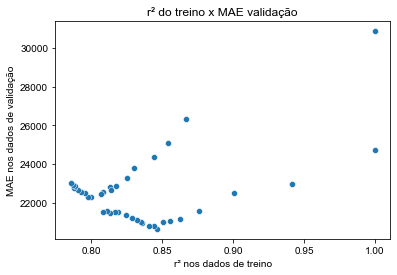

In [7]:
validacao = abs(grid_knn_reg.cv_results_['mean_test_score'])
tamanho = len(validacao)

r2train = []
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

for i in range(tamanho):
    hiper = list(grid_knn_reg.cv_results_['params'][i].values())
    knn_reg = KNeighborsRegressor(n_neighbors = hiper[1], metric = hiper[0])


    knn_reg.fit(X_train, y_train)

    # Calcular o teste

    y_pred_train = knn_reg.predict(X_train)
    r2train.append(r2_score(y_train, y_pred_train))
    
plt.xlabel("r² nos dados de treino")
plt.ylabel("MAE nos dados de validação")
sns.set(rc={"figure.figsize":(4, 8)})
sns.scatterplot(x = r2train, y = validacao)
plt.title("r² do treino x MAE validação")
plt.show()

In [8]:
grid_knn_reg.cv_results_

{'mean_fit_time': array([0.01496449, 0.01499057, 0.01540365, 0.01209824, 0.01149013,
        0.01295233, 0.011901  , 0.00909696, 0.01146176, 0.01171405,
        0.01044388, 0.01170855, 0.01162028, 0.0120909 , 0.01140723,
        0.01122525, 0.01057503, 0.01059   , 0.01199646, 0.01097944,
        0.00991678, 0.01245596, 0.01130419, 0.01047802, 0.01049724,
        0.00967374, 0.01059492, 0.0105238 , 0.01038334, 0.010095  ,
        0.01072397, 0.01066566, 0.01152055, 0.01306524, 0.01169019,
        0.01044691, 0.0088856 , 0.00945852, 0.00982735, 0.00947564]),
 'std_fit_time': array([0.00375335, 0.00472031, 0.00426273, 0.0014384 , 0.00148677,
        0.00262733, 0.001635  , 0.00152444, 0.00374171, 0.00273158,
        0.00130985, 0.00218551, 0.00201136, 0.00262129, 0.00157032,
        0.00195101, 0.00162145, 0.00367025, 0.00176923, 0.00141608,
        0.00069206, 0.00180071, 0.00282944, 0.00180167, 0.00111435,
        0.00119227, 0.00302658, 0.00194986, 0.00195334, 0.00144116,
        0.002